# Test different classification algorithms

In [ ]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import StandardScaler # scale data
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.metrics import classification_report, confusion_matrix # eval performance
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.svm import SVC # svc
import sklearn

In [3]:
# #test new library for benchmarking df
# # from https://nbviewer.jupyter.org/github/JosPolfliet/pandas-profiling/blob/master/examples/meteorites.ipynb
# import pandas_profiling

In [4]:
pd.set_option('display.height', 1000) # make printing better for the entire set of columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [94]:
data = pd.DataFrame.from_csv('arabica_to_classify.csv') # check our csv
data.head()
data_trainer = data.drop(['category_one_defects','category_two_defects'],axis=1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [95]:
data_trainer.head()

,country_of_origin,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,altitude_low_meters,altitude_high_meters,altitude_mean_meters,processing_method_Other,processing_method_Pulped natural / honey,processing_method_Semi-washed / Semi-pulped,processing_method_Washed / Wet,region
0,Ethiopia,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,1950.0,2200.0,2075.0,0,0,0,1,africa
1,Ethiopia,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,1950.0,2200.0,2075.0,0,0,0,1,africa
3,Ethiopia,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,1800.0,2200.0,2000.0,0,0,0,0,africa
4,Ethiopia,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,1950.0,2200.0,2075.0,0,0,0,1,africa
9,Ethiopia,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,0.10,1795.0,1850.0,1822.5,0,0,0,0,africa


In [106]:
# X contains the attributes, y contains the labels
# [row_start:row_end, col_start:col_end]
y = data_trainer.iloc[:,-1].values
X = data_trainer.iloc[:,2:-1].values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # train, test split ToDo add validate step

In [108]:
scaler = StandardScaler()  # normalize
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [109]:
#classifier = KNeighborsClassifier(n_neighbors=3)# n_neighbors = sqrt(num datapoints)
classifier = SVC(C=3)
#classifier = RandomForestClassifier(n_estimators=5)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 

In [110]:
# evaluate performance  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[11  0  6  2  4  0]
 [ 0  7  4  2  5  0]
 [ 1  1 43  8  5  0]
 [ 2  1 12 28  5  0]
 [ 1  1  7  1 29  0]
 [ 1  1  3  4  5  1]]
                       precision    recall  f1-score   support

               africa       0.69      0.48      0.56        23
                 asia       0.64      0.39      0.48        18
central_america_carib       0.57      0.74      0.65        58
        north_america       0.62      0.58      0.60        48
        south_america       0.55      0.74      0.63        39
       southeast_asia       1.00      0.07      0.12        15

          avg / total       0.63      0.59      0.57       201



In [31]:
error = []

# Calculating error for K values between 1 and 40

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

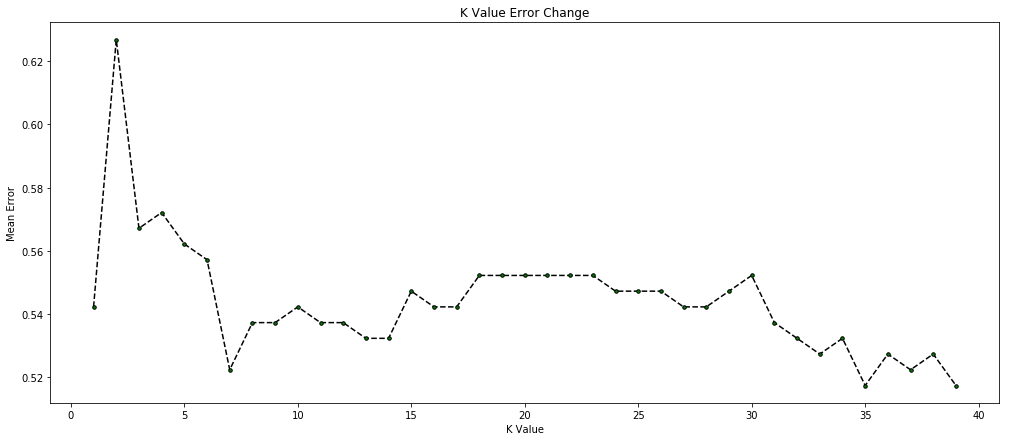

In [32]:
plt.figure(figsize=(17, 7))  
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='.', markerfacecolor='green', markersize=7)
plt.title('K Value Error Change')
plt.xlabel('K Value')
plt.ylabel('Mean Error')